In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

In [2]:
def matrix_multiply(X, Y):
    X = np.array(X.copy())
    Y = np.array(Y.copy())
    
    #for loop solution
    m = X.shape[0]
    n = X.shape[1]
    p = Y.shape[1]
    Z1 = np.zeros((m, p))
    for j in range(p):
        for i in range(m):
            for k in range(n):
                    Z1[i][j] += X[i][k]*Y[k][j]
    #np.dot solution              
    Z2 = np.dot(X,Y)
    question = '********************\nA dot B where: '+'\n' + 'A is ' +'\n'+ str(X) +'\n' + 'B is'+'\n' +str(Y)
    ans = '\n\nFor loop solution:\n ' + str(Z1) + '\n' + 'np.dot solution:\n ' + str(Z2) + '\n\n'
    return (question + ans)



A1 = [
    [1,2,3],
    [4,5,6]
]

B1 = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]


A2 = np.array([
    [1,2,3]
])


B2 = np.array([
    [1],
    [4],
    [7]
])


print(matrix_multiply(A1,B1))
print(matrix_multiply(A2,B2))

********************
A dot B where: 
A is 
[[1 2 3]
 [4 5 6]]
B is
[[1 2 3]
 [4 5 6]
 [7 8 9]]

For loop solution:
 [[30. 36. 42.]
 [66. 81. 96.]]
np.dot solution:
 [[30 36 42]
 [66 81 96]]


********************
A dot B where: 
A is 
[[1 2 3]]
B is
[[1]
 [4]
 [7]]

For loop solution:
 [[30.]]
np.dot solution:
 [[30]]




# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

2.1

If the determinant of the square matrix is equal to 0 then the matrix is non-invertible.

Given the following matrix A: 
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}

det(A) = ad-bc
0 = ad - bc
ad = bc

3 examples: 

\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}

\begin{bmatrix}
3 & 1 \\
6 & 2
\end{bmatrix}

\begin{bmatrix}
4 & 10 \\
2 & 5
\end{bmatrix}

2.2

Identity matrix $I_{2}$ : 

\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}

Example matrix A:
\begin{bmatrix}
a11 & b12 \\
a21 & b22
\end{bmatrix}

Property : AI = IA = A

AI :
\begin{bmatrix}
a11*1 + a21*0 & b11*1 + b21*0 \\
a11*0 + a21*1 & b11*0 + b22*1
\end{bmatrix}

IA:
\begin{bmatrix}
1 * a11 + 0*a21 & 1*b11 + 0*b21 \\
0 * a11 + a21*1 & 0*b11 + 1*b22
\end{bmatrix}

AI = IA = A only if I is square and has ones on the main diagonal and zeroes elsewhere in the matrix.

2.3

𝑡𝑟(𝐴𝐵C)!=𝑡𝑟(CB𝐴)

ex:

A:
\begin{bmatrix}
3 & 1 \\
1 & -1
\end{bmatrix}

B:
\begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}

C:
\begin{bmatrix}
3 & 2 \\
2 & 4
\end{bmatrix}

ABC:
\begin{bmatrix}
43 & 58 \\
5 & 6
\end{bmatrix}

CBA:
\begin{bmatrix}
37 & -5 \\
38 & -6
\end{bmatrix}

tr(ABC) = 49

tr(CBA) = 31

It is true that tr(ABC) != tr(CBA)

In [3]:
A = np.array([
    [3,1],
    [1,-1]
])

B = np.array([
    [2,3],
    [1,2]
])


C = np.array([
    [3,2],
    [2,4]
])


BC = np.dot(B,C)
ABC = np.dot(A,BC)
print(ABC)

BA = np.dot(B,A)
CBA = np.dot(C,BA)
print(CBA)


[[43 58]
 [ 5  6]]
[[37 -5]
 [38 -6]]


2.4

$I_{4}$ is an idempotent matrix

\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
\end{bmatrix}

In [4]:
I4 = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1],
])


print(matrix_multiply(I4,I4))

********************
A dot B where: 
A is 
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
B is
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

For loop solution:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
np.dot solution:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]




In [5]:
A =np.array(
    [[1, 1, 1],
    [0, 2, 5],
    [2, 5, -1]])

C =np.array([6,-4, 27])
B = np.linalg.solve(A,C)
print(B)

[ 5.  3. -2.]


# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [6]:
def regression_model(X, y):
    '''
    Function which returns Statsmodels summary for linear regression
    Input X: DataFrame X which includes features for each observations
    Input y: Results for each observations
    
    '''
    X = X.copy()
    y = y.copy()
    mod = sm.OLS(y,X)
    res = mod.fit(cov_type='HC2')
    return res.summary()
    

In [7]:
#load dataset and clean data
from sklearn.datasets import load_boston
global df

boston = load_boston()
boston_desc = load_boston()['DESCR']
boston_desc = boston_desc.split('\n\n')
boston_desc[5]= boston_desc[5].split('\n')
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
data = boston['data']
df = pd.DataFrame(data, columns = column_names)
df['MEDV'] = boston['target']

#Show variable description
boston_desc[5]

['    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways',
 '        - TAX      full-value property-tax rate per $10,000',
 '        - PTRATIO  pupil-teacher ratio by town',
 '        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town',
 '        - LSTAT    % lower status of the population',
 "        - MEDV     Median value of owne

In [8]:
#Split df into 2 dfs to visualize data in seaborn pairplot
df1 = df.iloc[:, 0:7].copy()
df1['MEDV'] = df['MEDV']
df2 = df.iloc[:, 7: 14]


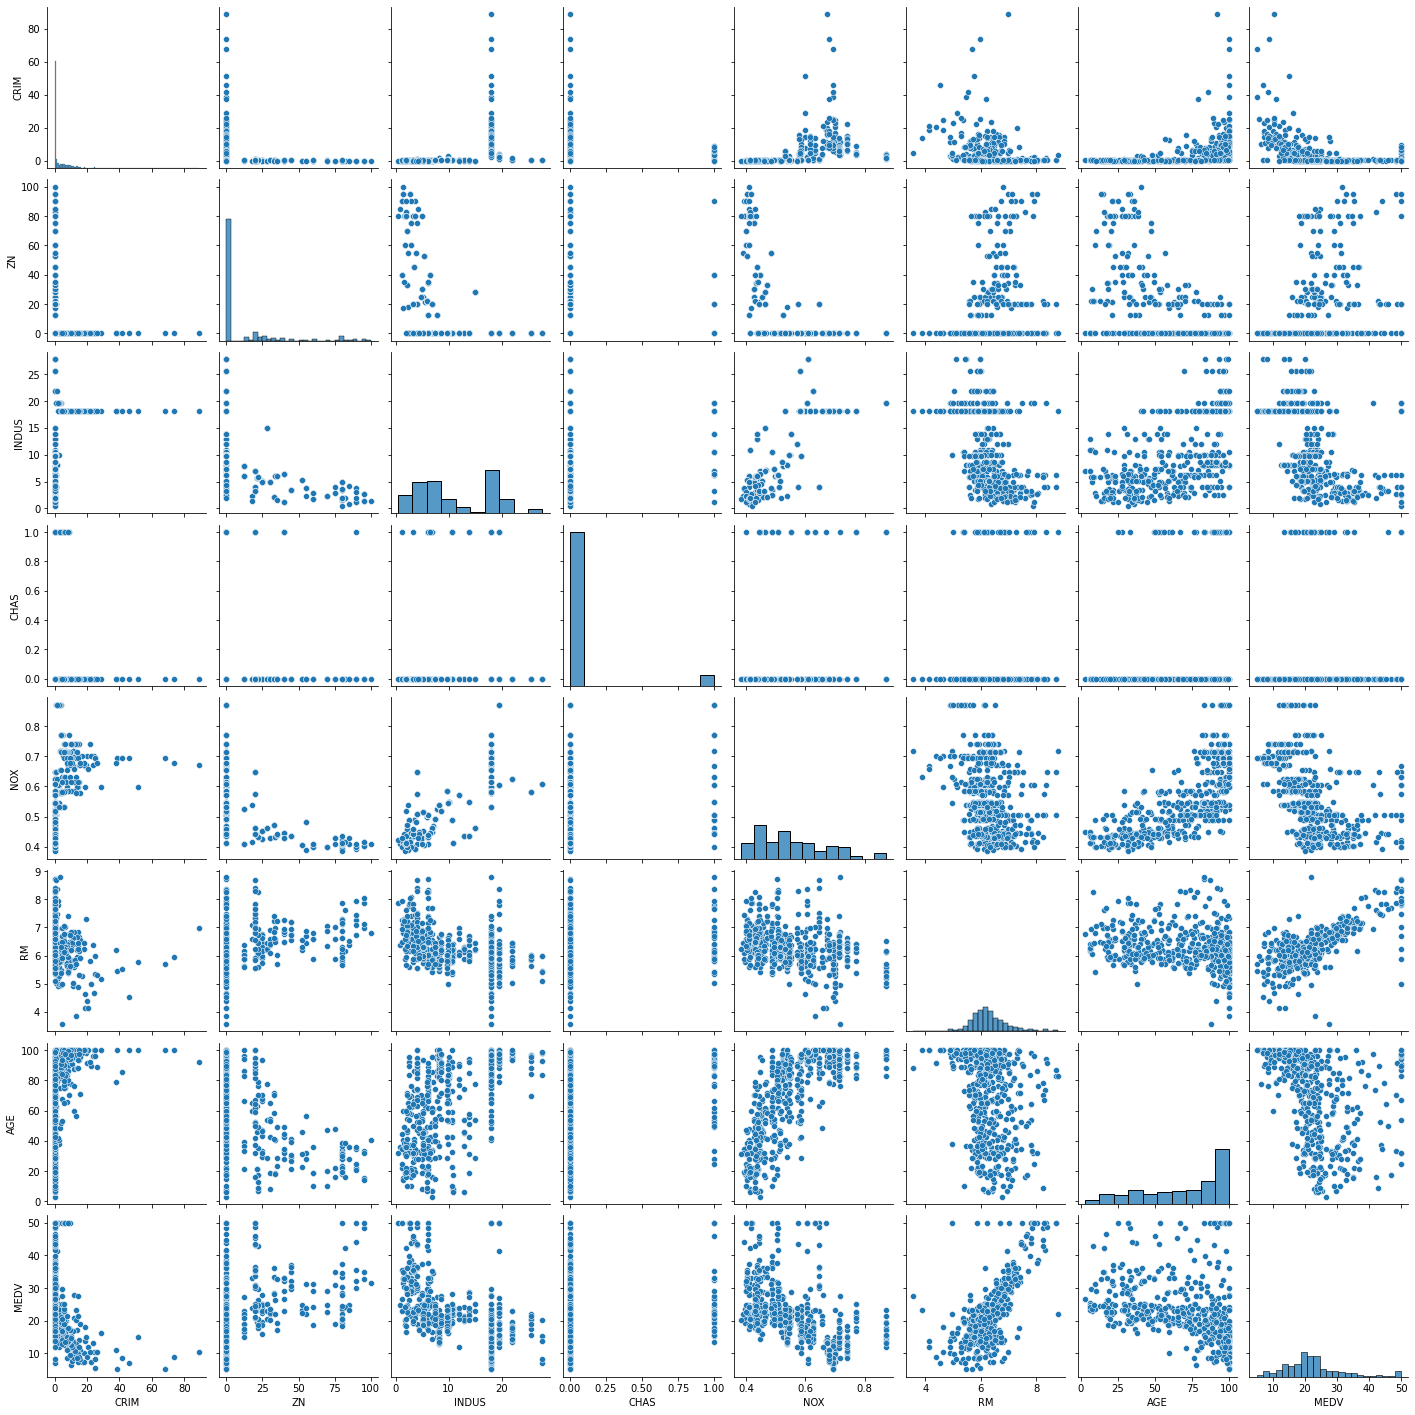

In [9]:
sns.pairplot(df1)

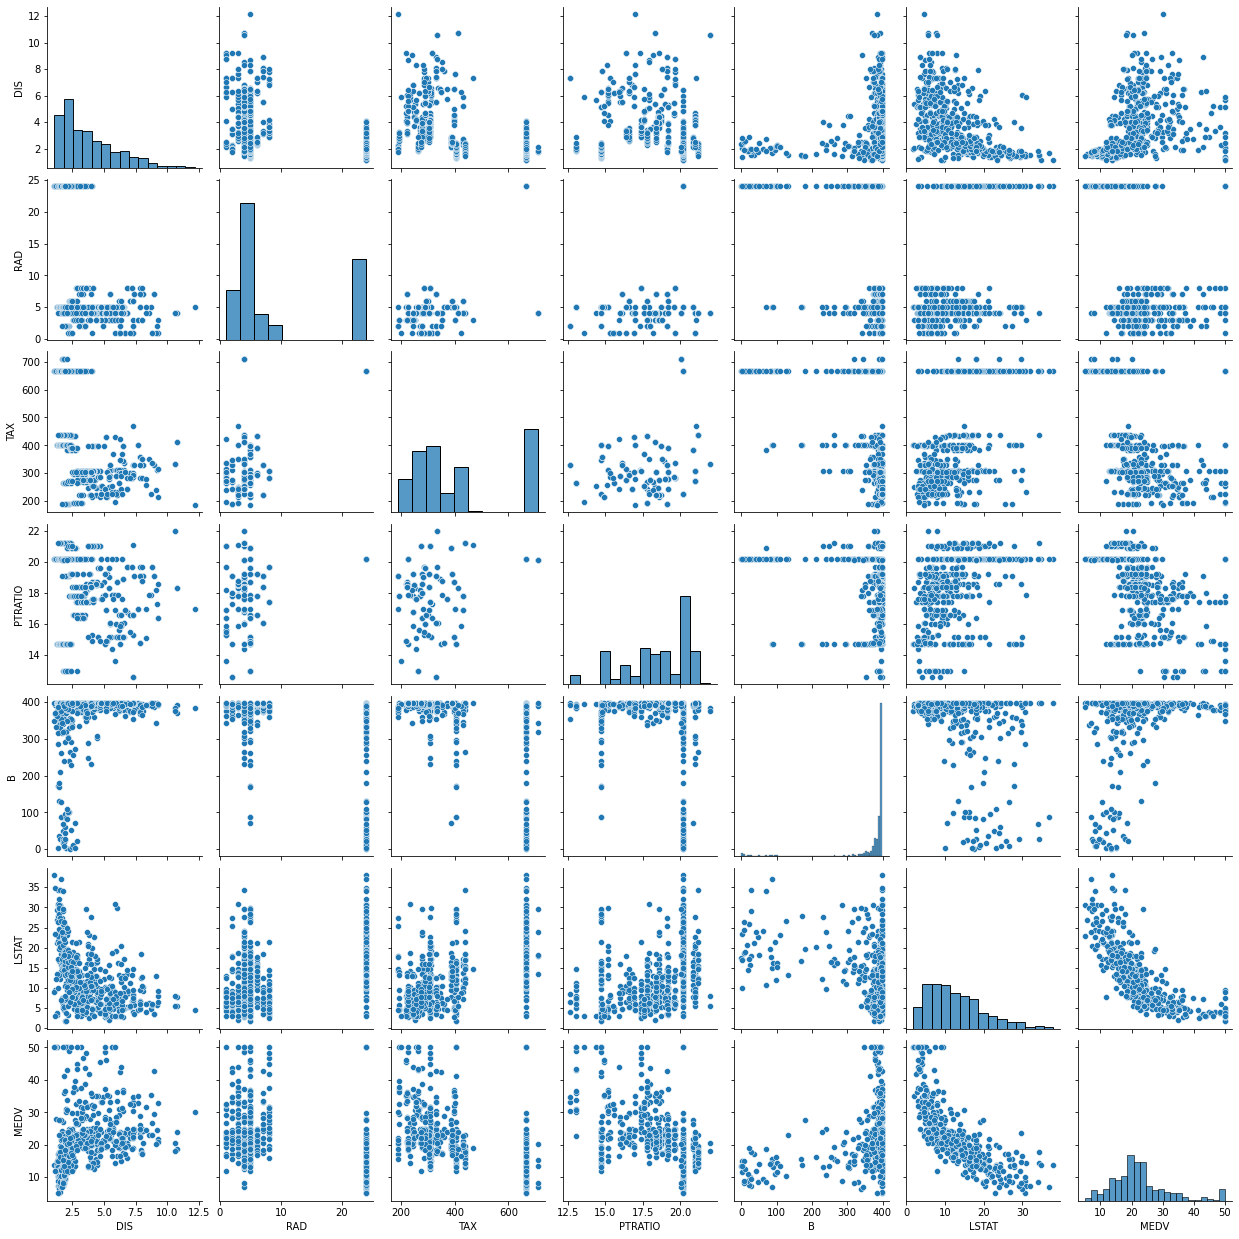

In [10]:
sns.pairplot(df2)

In [11]:
#Scenario 1: Include all features
X = df.iloc[:,:-1]
X = sm.add_constant(X)
y = df['MEDV']
regression_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     90.57
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          2.33e-121
Time:                        18:43:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      8.145      4.477      0.000      20.496      52.423
CRIM          -0.1080      0.031     -3.478      0.001      -0.169      -0.047
ZN             0.0464      0.014      3.345      0.001       0.019       0.074
INDUS          0.0206      0.051      0.406      0.685      -0.079       0.120
CHAS           2.6867      1.310      2.051      0.040       0.119       5.254
NOX          -17.7666      3.827     -4.643      0.000     -25.267     -10.266
RM             3.8099      0.861      4.426      0.000       2.123       5.497
AGE            0.0007      0.017      0.042      0.967      -0.032       0.033
DIS           -1.4756      0.217     -6.812      0.000      -1.900      -1.051
RAD            0.3060      0.062      4.908      0.000       0.184       0.428
TAX           -0.0123      0.003     -4.540      0.000      -0.018      -0.007
PTRATIO       -0.9527      0.118     -8.060      0.000      -1.184      -0.721
B              0.0093      0.003      3.435      0.001       0.004       0.015
LSTAT         -0.5248      0.101     -5.176      0.000      -0.723      -0.326
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#Scenario 2 : Age variable removed from dataset
variables = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[variables]
X = sm.add_constant(X)
regression_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     96.23
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          9.06e-121
Time:                        18:43:32   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4369      7.865      4.633      0.000      21.022      51.852
CRIM          -0.1080      0.031     -3.480      0.001      -0.169      -0.047
ZN             0.0463      0.013      3.446      0.001       0.020       0.073
INDUS          0.0206      0.051      0.407      0.684      -0.079       0.120
CHAS           2.6890      1.312      2.050      0.040       0.118       5.260
NOX          -17.7135      3.412     -5.192      0.000     -24.400     -11.027
RM             3.8144      0.803      4.750      0.000       2.241       5.388
DIS           -1.4786      0.227     -6.509      0.000      -1.924      -1.033
RAD            0.3058      0.060      5.099      0.000       0.188       0.423
TAX           -0.0123      0.003     -4.534      0.000      -0.018      -0.007
PTRATIO       -0.9522      0.115     -8.261      0.000      -1.178      -0.726
B              0.0093      0.003      3.451      0.001       0.004       0.015
LSTAT         -0.5239      0.086     -6.077      0.000      -0.693      -0.355
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#Scenario 3 : Age and Industrial variables removed from dataset

variables = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = df[variables]
X = sm.add_constant(X)
regression_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          4.39e-121
Time:                        18:43:32   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      7.878      4.613      0.000      20.900      51.782
CRIM          -0.1084      0.031     -3.513      0.000      -0.169      -0.048
ZN             0.0458      0.014      3.386      0.001       0.019       0.072
CHAS           2.7187      1.312      2.072      0.038       0.148       5.290
NOX          -17.3760      3.339     -5.204      0.000     -23.920     -10.832
RM             3.8016      0.798      4.765      0.000       2.238       5.365
DIS           -1.4927      0.223     -6.698      0.000      -1.929      -1.056
RAD            0.2996      0.062      4.852      0.000       0.179       0.421
TAX           -0.0118      0.003     -4.103      0.000      -0.017      -0.006
PTRATIO       -0.9465      0.113     -8.363      0.000      -1.168      -0.725
B              0.0093      0.003      3.449      0.001       0.004       0.015
LSTAT         -0.5226      0.086     -6.086      0.000      -0.691      -0.354
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Scenario 4 : Age, Industrial and B variables removed from dataset

variables = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
X = df[variables]
X = sm.add_constant(X)
regression_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          6.34e-120
Time:                        18:43:32   Log-Likelihood:                -1505.0
No. Observations:                 506   AIC:                             3032.
Df Residuals:                     495   BIC:                             3078.
Df Model:                          10                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4517      7.419      5.587      0.000      26.910      55.993
CRIM          -0.1217      0.025     -4.920      0.000      -0.170      -0.073
ZN             0.0462      0.014      3.393      0.001       0.020       0.073
CHAS           2.8719      1.328      2.162      0.031       0.268       5.476
NOX          -18.2624      3.395     -5.379      0.000     -24.917     -11.608
RM             3.6730      0.787      4.667      0.000       2.130       5.215
DIS           -1.5160      0.224     -6.757      0.000      -1.956      -1.076
RAD            0.2839      0.062      4.573      0.000       0.162       0.406
TAX           -0.0123      0.003     -4.226      0.000      -0.018      -0.007
PTRATIO       -0.9310      0.115     -8.105      0.000      -1.156      -0.706
LSTAT         -0.5465      0.086     -6.328      0.000      -0.716      -0.377
==============================================================================
Omnibus:                      172.594   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.971
Skew:                           1.486   Prob(JB):                    2.28e-158
Kurtosis:                       8.060   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#Scenario 5: Age, Industrial, B and Tax variables removed from dataset

variables = ['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
X = df[variables]
X = sm.add_constant(X)
regression_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     112.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          5.64e-114
Time:                        18:43:32   Log-Likelihood:                -1511.5
No. Observations:                 506   AIC:                             3043.
Df Residuals:                     496   BIC:                             3085.
Df Model:                           9                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9841      7.514      5.321      0.000      25.257      54.711
CRIM          -0.1185      0.026     -4.598      0.000      -0.169      -0.068
ZN             0.0366      0.013      2.710      0.007       0.010       0.063
CHAS           3.1394      1.286      2.440      0.015       0.618       5.661
NOX          -21.3757      3.516     -6.079      0.000     -28.268     -14.484
RM             3.8506      0.796      4.840      0.000       2.291       5.410
DIS           -1.4508      0.226     -6.419      0.000      -1.894      -1.008
RAD            0.1046      0.047      2.209      0.027       0.012       0.197
PTRATIO       -1.0018      0.116     -8.630      0.000      -1.229      -0.774
LSTAT         -0.5535      0.087     -6.360      0.000      -0.724      -0.383
==============================================================================
Omnibus:                      160.486   Durbin-Watson:                   1.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              623.744
Skew:                           1.400   Prob(JB):                    3.59e-136
Kurtosis:                       7.663   Cond. No.                         774.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

In [16]:
#Scenario 6:

variables = ['CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']
X = df[variables]
X = sm.add_constant(X)
regression_model(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.52e-112
Time:                        18:43:32   Log-Likelihood:                -1521.5
No. Observations:                 506   AIC:                             3059.
Df Residuals:                     498   BIC:                             3093.
Df Model:                           7                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3856      6.385      5.542      0.000      22.872      47.900
CRIM          -0.0868      0.028     -3.120      0.002      -0.141      -0.032
ZN             0.0402      0.014      2.822      0.005       0.012       0.068
NOX          -16.9023      3.204     -5.276      0.000     -23.181     -10.623
RM             4.0724      0.764      5.333      0.000       2.576       5.569
DIS           -1.4850      0.232     -6.394      0.000      -1.940      -1.030
PTRATIO       -0.8963      0.121     -7.384      0.000      -1.134      -0.658
LSTAT         -0.5561      0.091     -6.136      0.000      -0.734      -0.379
==============================================================================
Omnibus:                      195.391   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              942.340
Skew:                           1.653   Prob(JB):                    2.36e-205
Kurtosis:                       8.810   Cond. No.                         676.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `3.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.56e-112
Time:                        18:43:32   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.8620      0.872     49.149   

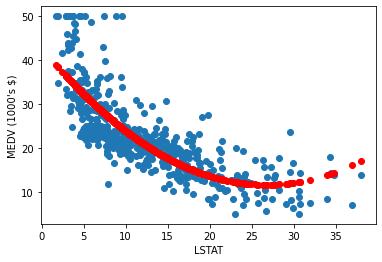

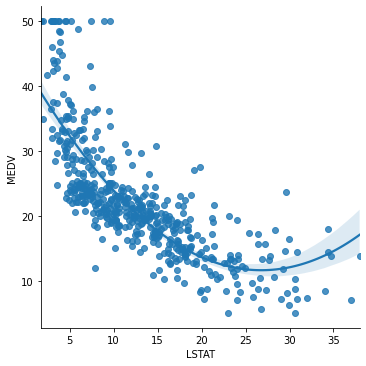

In [17]:
#Scenario 6 : 2nd order polynomial regression with 1 independent variable (i.e. "LSTAT")

X1 = df[['LSTAT', 'MEDV']].sort_values('MEDV')
X_lstat = X1[['LSTAT']]
X_lstat = sm.add_constant(X_lstat)
X_lstat['LSTAT_square']= X_lstat['LSTAT'].apply(lambda x: x**2)
y = X1['MEDV']

est = sm.OLS(y, X_lstat).fit()

xfit = np.array(X_lstat)
yfit = est.predict(xfit[:, np.newaxis])

print(est.summary())

#Graphs
fig, ax = plt.subplots()
plt.scatter(X_lstat['LSTAT'], y)
plt.xlabel('LSTAT')
plt.ylabel("MEDV (1000's $)")
ax.scatter(xfit[:,1], yfit, color = 'red')
sns.lmplot(x="LSTAT", y="MEDV", data=df, order=2)
plt.show()




In [18]:
#Scenario 7 : 2nd order polynomial regression with 2 independent variables (i.e. "LSTAT, RM")
X2 = df[['LSTAT', 'RM' ]] 
X2 = sm.add_constant(X2)
X2['LSTAT_SQ']= X2['LSTAT'].apply(lambda x: x**2)
X2['RM_SQ']= X2['RM'].apply(lambda x: x**2)
X2['LSTAT_RM'] = X2['LSTAT']*X2['RM']
y = df['MEDV']
est = sm.OLS(y, X2).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          5.55e-130
Time:                        18:43:33   Log-Likelihood:                -1482.0
No. Observations:                 506   AIC:                             2976.
Df Residuals:                     500   BIC:                             3001.
Df Model:                           5                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0081     33.178      1.839      0.066      -4.019     126.035
LSTAT          0.3710      0.998      0.372      0.710      -1.586       2.328
RM           -15.3604      8.918     -1.722      0.085     -32.839       2.119
LSTAT_SQ       0.0091      0.009      1.067      0.286      -0.008       0.026
RM_SQ          1.7283      0.619      2.790      0.005       0.514       2.942
LSTAT_RM      -0.2312      0.121     -1.905      0.057      -0.469       0.007
==============================================================================
Omnibus:                      169.606   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2154.012
Skew:                           1.079   Prob(JB):                         0.00
Kurtosis:                      12.875   Cond. No.                     2.63e+04
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#Scenario 8 : 2nd order polynomial regression with 3 independent variables (i.e. "LSTAT, RM, PTRATIO")
X3 = df[['LSTAT', 'RM', 'PTRATIO' ]] 
X3 = sm.add_constant(X3)
X3['LSTAT_SQ']= X3['LSTAT'].apply(lambda x: x**2)
X3['RM_SQ']= X3['RM'].apply(lambda x: x**2)
X3['LSTAT_RM'] = X3['LSTAT']*X3['RM']
X3['LSTAT_PTRATIO'] = X3['LSTAT']*X3['PTRATIO']
X3['RM_PTRATIO'] = X3['RM']*X3['PTRATIO']
X3['LSTAT_RM_PTRATIO'] = X3['LSTAT']*X3['RM']*X3['PTRATIO']
est = sm.OLS(y, X3).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.01e-167
Time:                        18:43:33   Log-Likelihood:                -1437.0
No. Observations:                 506   AIC:                             2894.
Df Residuals:                     496   BIC:                             2936.
Df Model:                           9                                         
Covariance Type:                  HC2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -146.1929     60.898     -2.401      0.016    -265.551     -26.834
LSTAT                6.0274      2.492      2.418      0.016       1.142      10.912
RM                  21.5182     12.584      1.710      0.087      -3.145      46.182
PTRATIO              9.7532      2.651      3.678      0.000       4.556      14.950
LSTAT_SQ             0.0130      0.008      1.588      0.112      -0.003       0.029
RM_SQ                0.8802      0.555      1.587      0.112      -0.207       1.967
LSTAT_RM            -0.9273      0.411     -2.255      0.024      -1.733      -0.121
LSTAT_PTRATIO       -0.3212      0.130     -2.477      0.013      -0.575      -0.067
RM_PTRATIO          -1.4779      0.403     -3.670      0.000      -2.267      -0.689
LSTAT_RM_PTRATIO     0.0400      0.021      1.889      0.059      -0.001       0.081
==============================================================================
Omnibus:                      243.882   Durbin-Watson:                   0.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2418.014
Skew:                           1.854   Prob(JB):                         0.00
Kurtosis:                      13.047   Cond. No.                     3.19e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 3.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
#Scenario 9 : 2nd order polynomial regression with 3 independent variables (i.e. "LSTAT, RM, PTRATIO") and considering interactions
X3 = df[['LSTAT', 'RM', 'PTRATIO' ]] 
X3 = sm.add_constant(X3)
X3['LSTAT_RM'] = X3['LSTAT']*X3['RM']
X3['LSTAT_PTRATIO'] = X3['LSTAT']*X3['PTRATIO']
X3['RM_PTRATIO'] = X3['RM']*X3['PTRATIO']
X3['LSTAT_RM_PTRATIO'] = X3['LSTAT']*X3['RM']*X3['PTRATIO']
est = sm.OLS(y, X3).fit(cov_type='HC2')
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     281.6
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          1.21e-168
Time:                        18:43:33   Log-Likelihood:                -1444.5
No. Observations:                 506   AIC:                             2905.
Df Residuals:                     498   BIC:                             2939.
Df Model:                           7                                         
Covariance Type:                  HC2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -218.1978     35.945     -6.070      0.000    -288.648    -147.747
LSTAT                8.4720      2.220      3.815      0.000       4.120      12.824
RM                  38.1422      5.398      7.066      0.000      27.562      48.722
PTRATIO             10.8564      2.174      4.995      0.000       6.596      15.117
LSTAT_RM            -1.2635      0.367     -3.445      0.001      -1.982      -0.545
LSTAT_PTRATIO       -0.3686      0.121     -3.045      0.002      -0.606      -0.131
RM_PTRATIO          -1.6517      0.329     -5.027      0.000      -2.296      -1.008
LSTAT_RM_PTRATIO     0.0478      0.020      2.405      0.016       0.009       0.087
==============================================================================
Omnibus:                      271.522   Durbin-Watson:                   0.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2921.458
Skew:                           2.104   Prob(JB):                         0.00
Kurtosis:                      13.994   Cond. No.                     2.20e+05
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 2.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

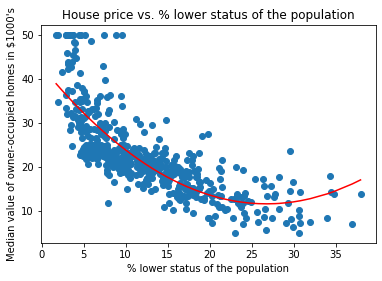

In [21]:
X = df[['LSTAT', 'MEDV']].sort_values('LSTAT')
X_lstat = X[['LSTAT']]
X_lstat = sm.add_constant(X_lstat)
X_lstat['LSTAT_SQ']= X_lstat['LSTAT'].apply(lambda x: x**2)
y = X['MEDV']
est = sm.OLS(y, X_lstat).fit(cov_type='HC2')

xfit = np.array(X_lstat)
yfit = est.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots()
plt.scatter(X_lstat['LSTAT'], y)
ax.plot(xfit[:,1],yfit , color = 'red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.title('House price vs. % lower status of the population')
plt.show()



# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

In [22]:
def reg_plot_on_ax(feature, axis):
    '''Plot regression line from data points of given feature'''
    dframe = df.copy()
    dframe = dframe[[feature, 'MEDV']].sort_values(feature)
    X = dframe[[feature]]
    X = sm.add_constant(X)
    X['feature_sq'] = X[feature].apply(lambda x: x**2)
    y = dframe['MEDV']
    
    #Prediction
    xfit = np.array(X)
    est = sm.OLS(y, X).fit(cov_type='HC2')
    yfit = est.predict(xfit[:, np.newaxis])
    
    #plot
    axis.scatter(X[feature], y, alpha = 0.5)
    axis.plot(xfit[:,1], yfit, color = 'red')

    axis.set_xlabel(f'{feature}')
    axis.set_ylabel("Median value of owner-occupied homes in $1000's")
    

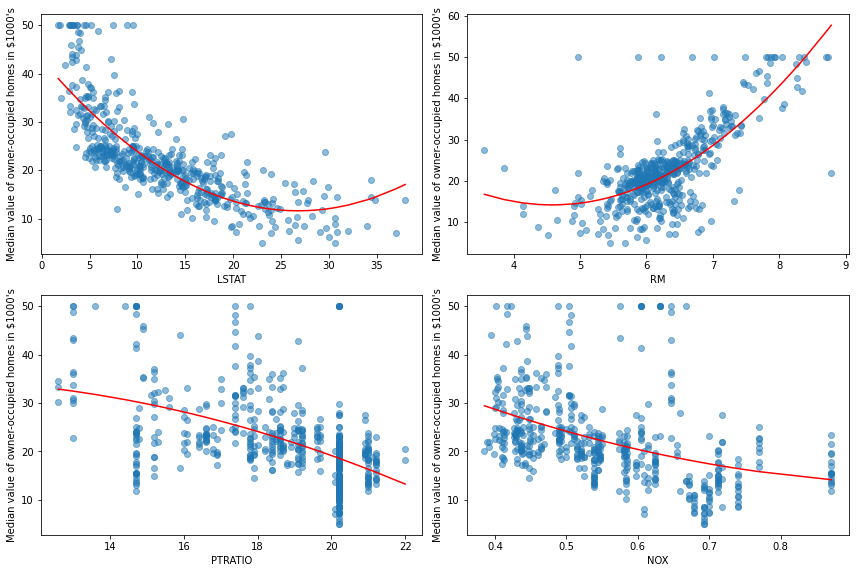

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12,8))
reg_plot_on_ax('LSTAT',ax1)
reg_plot_on_ax('RM', ax2)
reg_plot_on_ax('PTRATIO', ax3)
reg_plot_on_ax('NOX', ax4)
plt.tight_layout()
